In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("users.dat", sep="::", header=None)

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
0    6040 non-null int64
1    6040 non-null object
2    6040 non-null int64
3    6040 non-null int64
4    6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None


/home/nicola/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
usersHeader = ["userID", "gender", "age", "occupation", "zipCode"]
users.columns = usersHeader
users.head(10)

,userID,gender,age,occupation,zipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [4]:
modified = []

def clean_zipCode(value):
    t = value.split("-")
    if(len(t) > 1):
        global modified
        modified.append(t)
    return int(t[0])


users["zipCode"] = users["zipCode"].apply(clean_zipCode)

print(users.info())

print("modified {} elements".format(len(modified)))
print(modified)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
userID        6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipCode       6040 non-null int64
dtypes: int64(4), object(1)
memory usage: 236.0+ KB
None
modified 66 elements
[['98107', '2117'], ['37919', '4204'], ['55337', '4056'], ['55405', '2546'], ['55103', '1006'], ['52570', '9634'], ['01702', '7224'], ['20744', '6223'], ['20110', '5616'], ['48103', '8929'], ['53404', '1230'], ['68144', '2410'], ['93420', '2852'], ['84112', '2004'], ['92612', '3417'], ['23464', '3016'], ['72227', '5733'], ['92683', '1892'], ['98043', '3621'], ['11710', '1641'], ['33067', '1400'], ['02136', '1522'], ['37923', '3112'], ['27713', '9225'], ['88005', '4313'], ['95451', '9554'], ['48103', '4711'], ['64081', '8102'], ['80004', '4448'], ['50265', '2850'], ['08854', '3115'], ['27514', '3540'], ['15701', '1348'], ['91790', '1161']

In [5]:
mod_age = 0

def clean_age(age):
    if age==1:
        return 6+(18-6)/2
    elif age==18:
        return age+(24-18)/2
    elif age==25:
        return age+(34-25)/2
    elif age==35:
        return age+(44-35)/2
    elif age==45:
        return age+(49-45)/2
    elif age==50:
        return age+(55-50)/2
    elif age==56:
        return age+(80-56)/2
    else:
        global mod_age
        mod_age = mod_age+1
        return np.nan

users["age"] = users["age"].apply(clean_age)
print("mod_age Nan: {}".format(mod_age))


mod_age Nan: 0


In [6]:
occu = {
    0:"other",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"}


# maybe not the case, too much space, only for plots
# users["occupation"].replace(occu, inplace=True)

In [7]:
zipp = pd.read_csv("zip.csv")
print(zipp.info())

print(zipp.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81831 entries, 0 to 81830
Data columns (total 20 columns):
RecordNumber           81831 non-null int64
Zipcode                81831 non-null int64
ZipCodeType            81831 non-null object
City                   81831 non-null object
State                  81831 non-null object
LocationType           81831 non-null object
Lat                    81178 non-null float64
Long                   81178 non-null float64
Xaxis                  81831 non-null float64
Yaxis                  81831 non-null float64
Zaxis                  81831 non-null float64
WorldRegion            334 non-null object
Country                81831 non-null object
LocationText           81180 non-null object
Location               81830 non-null object
Decommisioned          81831 non-null bool
TaxReturnsFiled        58447 non-null float64
EstimatedPopulation    58447 non-null float64
TotalWages             58354 non-null float64
Notes                  1844 non-nu

/home/nicola/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
zipp = zipp[["Zipcode", "City", "State", "Lat", "Long", "Country"]]
zipp.columns = ["zipCode", "city", "state", "lat", "long", "country"]

In [9]:
zipp.head(2)

,zipCode,city,state,lat,long,country
0,704,PARC PARQUE,PR,17.96,-66.22,US
1,704,PASEO COSTA DEL SUR,PR,17.96,-66.22,US


In [10]:
zipp["zipCode"].value_counts()

926      130
725       82
662       75
969       73
612       68
953       55
693       54
646       50
716       49
959       48
727       47
949       47
791       47
736       47
738       46
698       45
728       45
778       44
674       44
976       44
680       43
623       42
784       41
966       40
924       39
730       39
682       38
795       38
956       38
987       36
        ... 
94603      1
63738      1
45363      1
51452      1
49405      1
53503      1
67844      1
71942      1
96522      1
98581      1
10528      1
6438       1
24873      1
16685      1
22830      1
37175      1
96650      1
57657      1
76096      1
72006      1
94539      1
86351      1
4455       1
20847      1
35188      1
63866      1
78211      1
92552      1
90505      1
4098       1
Name: zipCode, Length: 42522, dtype: int64

In [11]:
# many cities have the same zipCode, I drop some value otherwise 
# the join goes bad

zipp = zipp.drop_duplicates(subset="zipCode", keep="first")

zipp["zipCode"].value_counts()

2047     1
30180    1
24033    1
87520    1
44511    1
42462    1
48605    1
77054    1
96679    1
99802    1
40409    1
70606    1
58838    1
62932    1
50642    1
74340    1
54736    1
11727    1
75214    1
19939    1
32229    1
23541    1
28135    1
87552    1
90075    1
48637    1
70005    1
33673    1
38392    1
92124    1
        ..
23326    1
82717    1
84764    1
95003    1
97050    1
27416    1
21780    1
72470    1
2836     1
49965    1
56110    1
23514    1
23358    1
73645    1
39750    1
99141    1
35652    1
45891    1
47938    1
43840    1
17213    1
74545    1
95035    1
31546    1
25401    1
70455    1
821      1
68404    1
13107    1
65536    1
Name: zipCode, Length: 42522, dtype: int64

In [12]:
full = pd.merge(users, zipp, how="inner", on="zipCode")

print(full.head(2))

print("\nlost {} values in the join".format( users.shape[0]-full.shape[0] ))

   userID gender   age  occupation  zipCode       city state   lat   long  \
0       1      F  12.0          10    48067  ROYAL OAK    MI  42.5 -83.15   
1     583      F  29.5           0    48067  ROYAL OAK    MI  42.5 -83.15   

  country  
0      US  
1      US  

lost 68 values in the join


In [14]:
full.head(10)

,userID,gender,age,occupation,zipCode,city,state,lat,long,country
0,1,F,12.0,10,48067,ROYAL OAK,MI,42.50,-83.15,US
1,583,F,29.5,0,48067,ROYAL OAK,MI,42.50,-83.15,US
2,1510,F,29.5,1,48067,ROYAL OAK,MI,42.50,-83.15,US
3,2098,M,39.5,20,48067,ROYAL OAK,MI,42.50,-83.15,US
4,4517,F,21.0,1,48067,ROYAL OAK,MI,42.50,-83.15,US
5,4952,F,29.5,14,48067,ROYAL OAK,MI,42.50,-83.15,US
6,2,M,68.0,16,70072,MARRERO,LA,29.88,-90.11,US
7,3,M,29.5,15,55117,SAINT PAUL,MN,44.94,-93.10,US
8,6,F,52.5,9,55117,SAINT PAUL,MN,44.94,-93.10,US
9,201,F,39.5,2,55117,SAINT PAUL,MN,44.94,-93.10,US


In [17]:
full = full.sort_values("userID", ascending=True)

In [20]:
full.head(10)

filename="usersfull.csv"

ret = full.to_csv(path_or_buf=filename, sep=",", header=True, index=False)

print(type(ret))
print(ret)

<class 'NoneType'>
None


In [13]:
print(full["state"].value_counts())

CA    1100
NY     464
MN     432
TX     311
MA     298
IL     287
MI     254
OH     220
WA     198
PA     177
VA     174
FL     159
WI     138
NJ     130
OR     117
CO     101
TN      98
NC      94
GA      91
MD      86
AZ      84
IN      80
MO      79
CT      79
IA      57
ME      51
KY      46
NH      43
OK      42
KS      39
NV      39
LA      35
SC      34
DC      32
UT      32
AR      29
NM      25
HI      24
AL      23
RI      22
NE      21
WV      16
DE      15
VT      14
ID      13
MT      12
SD      10
MS       9
AK       9
ND       8
WY       7
PR       6
AE       4
AP       3
GU       1
Name: state, dtype: int64


In [21]:
ca_mask = full["state"].astype("str") == "CA"
len(ca_mask)

ca = full[ca_mask]

ca.head(10)

,userID,gender,age,occupation,zipCode,city,state,lat,long,country
41,10,F,39.5,1,95370,SONORA,CA,37.98,-120.39,US
45,13,M,47.0,1,93304,BAKERSFIELD,CA,35.33,-119.02,US
67,17,M,52.5,1,95350,MODESTO,CA,37.67,-121.01,US
68,18,F,21.0,3,95825,SACRAMENTO,CA,38.58,-121.40,US
99,23,M,39.5,0,90049,LOS ANGELES,CA,34.08,-118.49,US
147,36,M,29.5,3,94123,SAN FRANCISCO,CA,37.80,-122.43,US
180,45,F,47.0,16,94110,SAN FRANCISCO,CA,37.74,-122.41,US
199,47,M,21.0,4,94305,STANFORD,CA,37.41,-122.17,US
203,48,M,29.5,4,92107,SAN DIEGO,CA,32.73,-117.24,US
232,61,M,29.5,17,95122,SAN JOSE,CA,37.33,-121.83,US


In [74]:
rows = np.random.choice(ca.index.values, 10)
print(ca.loc[rows])

      userID gender   age  occupation  zipCode          city state    lat  \
67        17      M  52.5           1    95350       MODESTO    CA  37.67   
2289    1901      M  52.5           7    94024     LOS ALTOS    CA  37.34   
2703    1440      M  39.5          12    94520       CONCORD    CA  38.00   
5652    5165      M  39.5           6    91103      PASADENA    CA  34.17   
4875    3947      M  29.5           0    90019   LOS ANGELES    CA  34.04   
598      221      F  29.5           0    94063  REDWOOD CITY    CA  37.49   
5520    4880      F  47.0           9    95030     LOS GATOS    CA  37.22   
201     3767      M  29.5           0    94305      STANFORD    CA  37.41   
1441     644      M  29.5          20    93704        FRESNO    CA  36.80   
2502    1290      M  39.5           0    91504       BURBANK    CA  34.20   

        long country  
67   -121.01      US  
2289 -122.11      US  
2703 -122.03      US  
5652 -118.17      US  
4875 -118.34      US  
598  -122.21  

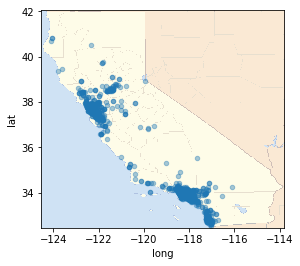

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

california_img = mpimg.imread('california.png')

plt.figure(figsize=(20,20))

ax = ca.plot(kind="scatter", x="long", y="lat", alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.show()

In [75]:
ca['occupation'].count_values().plot(kind='pie')

AttributeError: 'Series' object has no attribute 'count_values'

In [26]:
occu = {
    0:"other",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"}


# maybe not the case, too much space, only for plots
users["occupation"].replace(occu, inplace=True)

In [27]:
users.head(3)

,userID,gender,age,occupation,zipCode
0,1,F,12.0,K-12 student,48067
1,2,M,68.0,self-employed,70072
2,3,M,29.5,scientist,55117


M    4331
F    1709
Name: gender, dtype: int64


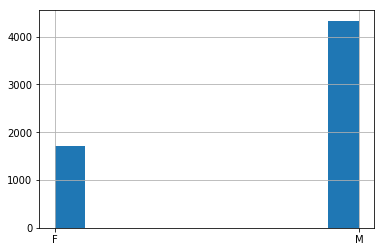

In [18]:
print(users["gender"].value_counts(dropna=False))
users["gender"].hist()


29.5    2096
39.5    1193
21.0    1103
47.0     550
52.5     496
68.0     380
12.0     222
Name: age, dtype: int64


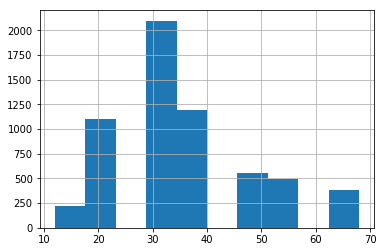

In [19]:
print(users["age"].value_counts(dropna=False))
users["age"].hist()

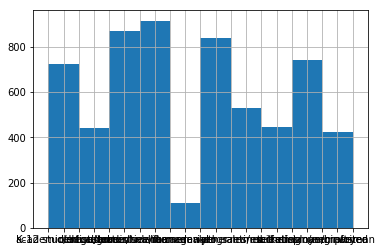

In [31]:
users["occupation"].hist()

<class 'pandas.core.series.Series'>
occupation
K-12 student            195
academic/educator       528
artist                  267
clerical/admin          173
college/grad student    759
customer service        112
doctor/health care      236
executive/managerial    679
farmer                   17
homemaker                92
lawyer                  129
other                   711
programmer              388
retired                 142
sales/marketing         302
scientist               144
self-employed           241
technician/engineer     502
tradesman/craftsman      70
unemployed               72
writer                  281
dtype: int64


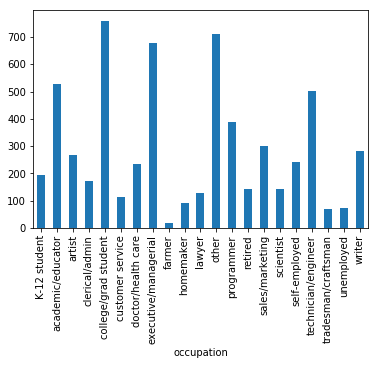

In [41]:
a = users.groupby("occupation").size()
print(type(a))
print(a)
a.plot(kind='bar')

In [47]:
table = pd.pivot_table(users, index=['gender', 'occupation'], values=['age'], aggfunc=np.mean)
table

age
gender occupation                     
F      K-12 student          12.409091
       academic/educator     39.662679
       artist                38.060440
       clerical/admin        38.080000
       college/grad student  24.378205
       customer service      34.693548
       doctor/health care    41.794118
       executive/managerial  37.622302
       farmer                53.333333
       homemaker             38.544944
       lawyer                36.818182
       other                 35.329741
       programmer            38.520000
       retired               64.485294
       sales/marketing       33.550633
       scientist             37.392857
       self-employed         43.823529
       technician/engineer   34.605769
       tradesman/craftsman   41.000000
       unemployed            25.766667
       writer                36.403846
M      K-12 student          14.596899
       academic/educator     41.195925
       artist                33.281250
       clerical/admin        36.849315
       college/grad student  23.622857
       customer service      33.049383
       doctor/health care    40.921642
       executive/managerial  39.625926
       farmer                37.464286
       homemaker             30.000000
       lawyer                38.551402
       other                 33.899791
       programmer            33.125740
       retired               62.032407
       sales/marketing       36.226457
       scientist             35.198276
       self-employed         41.713158
       technician/engineer   36.671111
       tradesman/craftsman   37.212121
       unemployed            26.675439
       writer                34.733990

In [52]:
print(type(table))
print(table.loc["M"])
print(type(table.loc["M"]))

<class 'pandas.core.frame.DataFrame'>
                            age
occupation                     
K-12 student          14.596899
academic/educator     41.195925
artist                33.281250
clerical/admin        36.849315
college/grad student  23.622857
customer service      33.049383
doctor/health care    40.921642
executive/managerial  39.625926
farmer                37.464286
homemaker             30.000000
lawyer                38.551402
other                 33.899791
programmer            33.125740
retired               62.032407
sales/marketing       36.226457
scientist             35.198276
self-employed         41.713158
technician/engineer   36.671111
tradesman/craftsman   37.212121
unemployed            26.675439
writer                34.733990
<class 'pandas.core.frame.DataFrame'>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f764e346be0>],
      dtype=object)

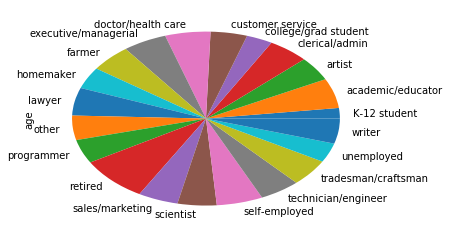

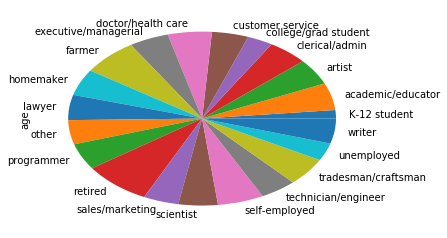

In [62]:
table.loc["M"].plot(kind='pie',subplots=True, legend=False)# , subplots=True)# .legend(loc='best')
table.loc["F"].plot(kind='pie',subplots=True, legend=False)# , subplots=True)# .legend(loc='best')

In [123]:
u_go = users.groupby(["gender", "occupation"]).size()
print(u_go)

gender  occupation          
F       K-12 student             66
        academic/educator       209
        artist                   91
        clerical/admin          100
        college/grad student    234
        customer service         31
        doctor/health care      102
        executive/managerial    139
        farmer                    3
        homemaker                89
        lawyer                   22
        other                   232
        programmer               50
        retired                  34
        sales/marketing          79
        scientist                28
        self-employed            51
        technician/engineer      52
        tradesman/craftsman       4
        unemployed               15
        writer                   78
M       K-12 student            129
        academic/educator       319
        artist                  176
        clerical/admin           73
        college/grad student    525
        customer service         81

<class 'pandas.core.series.Series'>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f764d951748>],
      dtype=object)

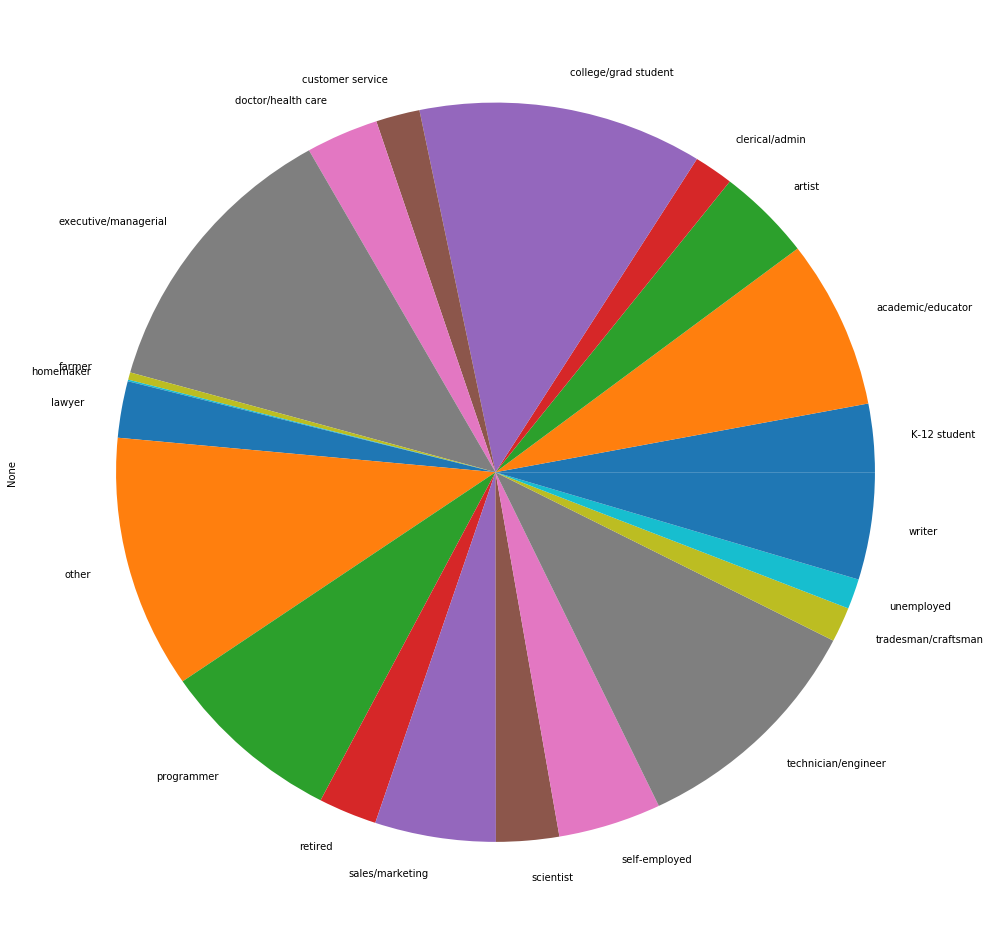

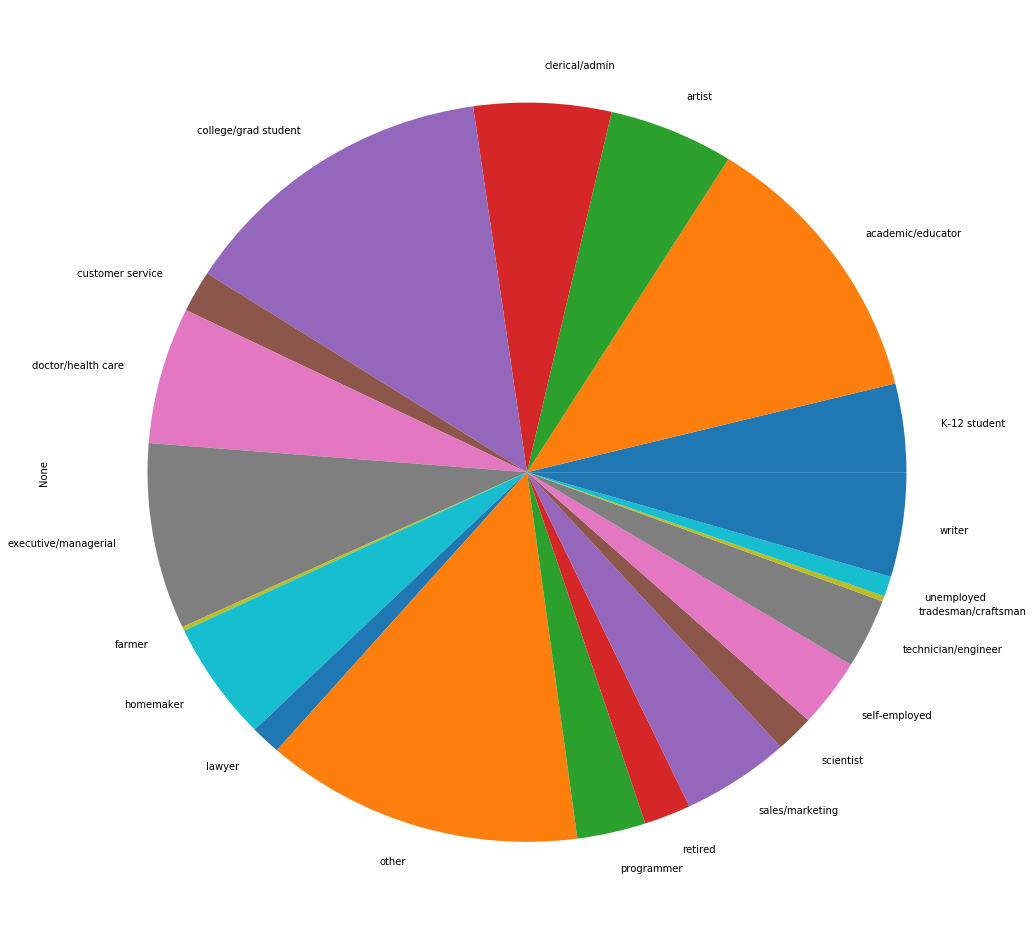

In [124]:
print(type(u_go.loc["M"]))
plt.figure(figsize=(17,17))
u_go.loc["M"].plot(kind='pie', subplots=True)
plt.figure(figsize=(17,17))
u_go.loc["F"].plot(kind='pie', subplots=True)

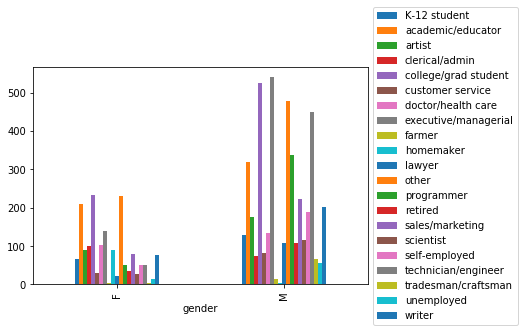

In [22]:
u_go.unstack().plot(kind='bar',).legend(loc='best', bbox_to_anchor=(1, 1.3))
plt.show()

In [78]:
table = pd.pivot_table(users, index='occupation', values="gender", aggfunc='count')
print(table)
table["gender"].sum()

6040

In [121]:
mf = u_go = users.groupby(["occupation", "gender"]).size()
# print(mf)
# print(type(mf))
# print(mf.columns)
#print(mf['occupation'])
# table1 = pd.pivot_table(mf, index='occupation', columns='gender')
table = pd.pivot_table(users, index='occupation', columns='gender', aggfunc='count', values='age', margins=True)
print(table)
table = pd.pivot_table(users, index='occupation', columns='gender', aggfunc='count', values='age')
print(table)
flattened = pd.DataFrame(table.to_records())
print(flattened)
# print(mf)
# table = pd.pivot_table(mf, index='occupation', columns='gender')
# print(table)
# table1 = pd.pivot_table(mf, index='occupation')
# print(table1)

gender                     F       M     All
occupation                                  
K-12 student            66.0   129.0   195.0
academic/educator      209.0   319.0   528.0
artist                  91.0   176.0   267.0
clerical/admin         100.0    73.0   173.0
college/grad student   234.0   525.0   759.0
customer service        31.0    81.0   112.0
doctor/health care     102.0   134.0   236.0
executive/managerial   139.0   540.0   679.0
farmer                   3.0    14.0    17.0
homemaker               89.0     3.0    92.0
lawyer                  22.0   107.0   129.0
other                  232.0   479.0   711.0
programmer              50.0   338.0   388.0
retired                 34.0   108.0   142.0
sales/marketing         79.0   223.0   302.0
scientist               28.0   116.0   144.0
self-employed           51.0   190.0   241.0
technician/engineer     52.0   450.0   502.0
tradesman/craftsman      4.0    66.0    70.0
unemployed              15.0    57.0    72.0
writer    

In [125]:
flattened.set_index('occupation', inplace=True)
print(flattened)

                        F    M
occupation                    
K-12 student           66  129
academic/educator     209  319
artist                 91  176
clerical/admin        100   73
college/grad student  234  525
customer service       31   81
doctor/health care    102  134
executive/managerial  139  540
farmer                  3   14
homemaker              89    3
lawyer                 22  107
other                 232  479
programmer             50  338
retired                34  108
sales/marketing        79  223
scientist              28  116
self-employed          51  190
technician/engineer    52  450
tradesman/craftsman     4   66
unemployed             15   57
writer                 78  203


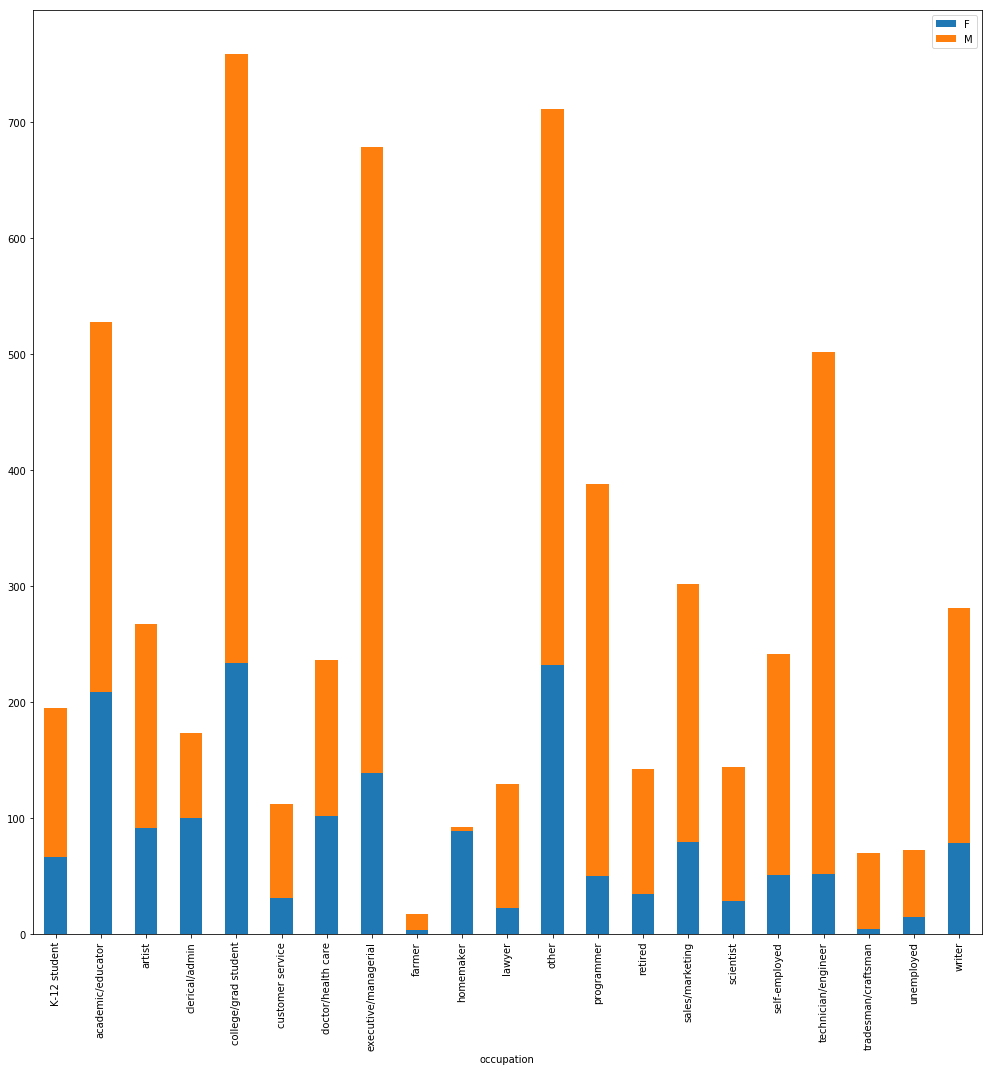

In [129]:
plt.figure(figsize=(17,17))
flattened.plot.bar(stacked=True, figsize=(17,17))

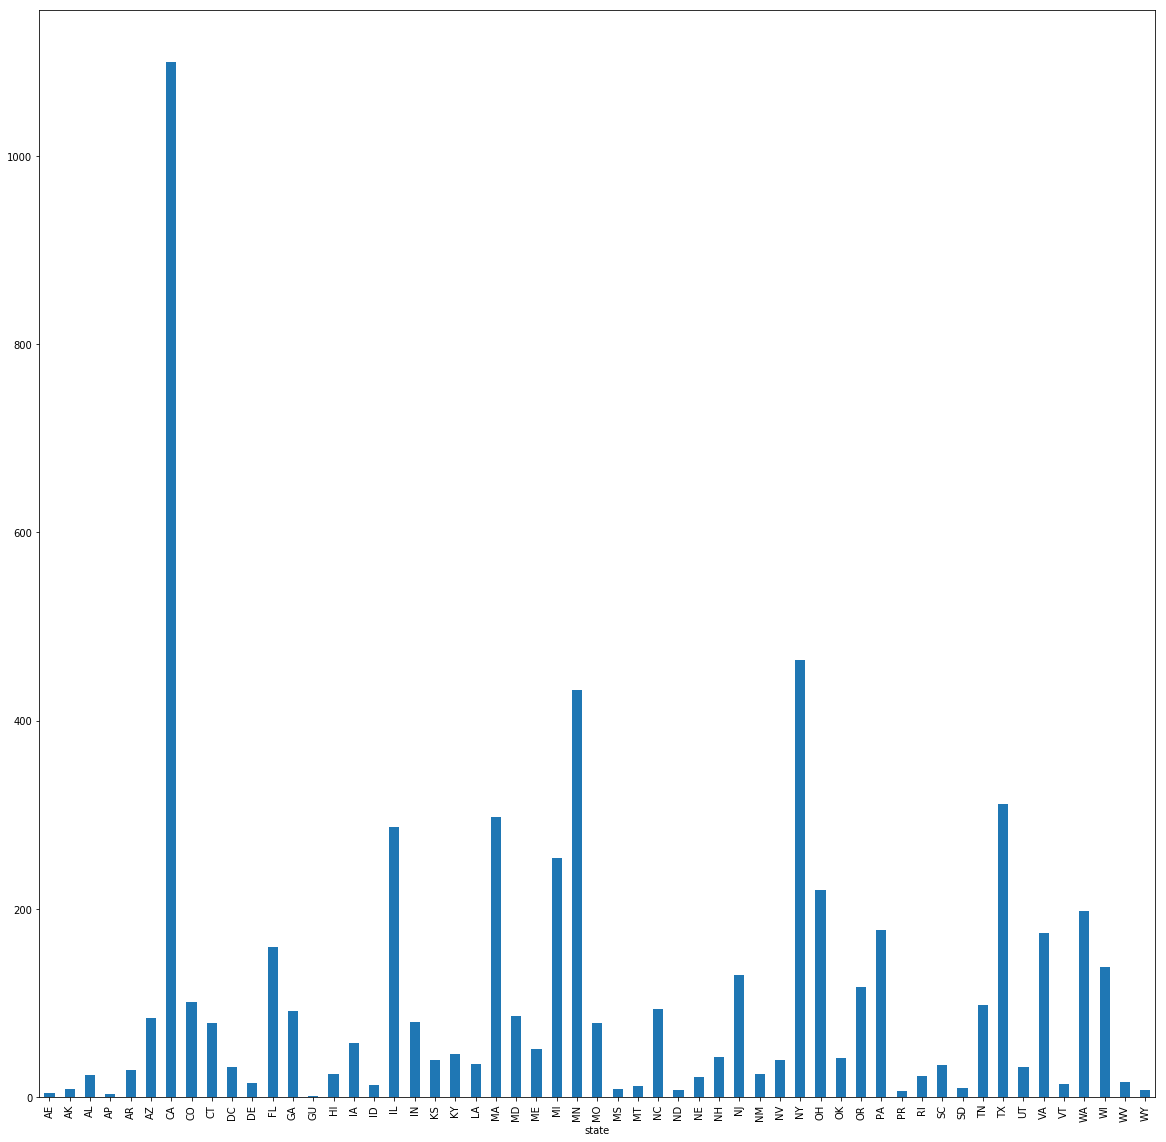

In [23]:
f_state = full.groupby("state").size()
#print(f_state)

plt.figure(figsize=(20,20))
f_state.plot(kind="bar")

In [29]:
state_mask = (full["state"].astype("str") == "CA") | (full["state"].astype("str") == "NY")
# | (full["state"].astype("str") == "MN") | (full["state"].astype("str") == "TX")
# state_mask_ca = full["state"].astype("str") in ["CA", "NY"]

state_mask 
print(state_mask.shape)

# type(full[state_mask]["state"])
# print(full[state_mask]["state"])

(5972,)


In [33]:
cany = full[state_mask].groupby(["state", "occupation"]).size()

cany

state  occupation
CA     0             130
       1              83
       2              66
       3              27
       4             116
       5              16
       6              38
       7             120
       8               4
       9               8
       10             24
       11             14
       12             83
       13             31
       14             57
       15             40
       16             43
       17            104
       18              4
       19             15
       20             77
NY     0              61
       1              39
       2              31
       3               8
       4              50
       5               9
       6              13
       7              75
       8               2
       9               6
       10             14
       11             13
       12             23
       13             10
       14             20
       15              7
       16             22
       17             17
       

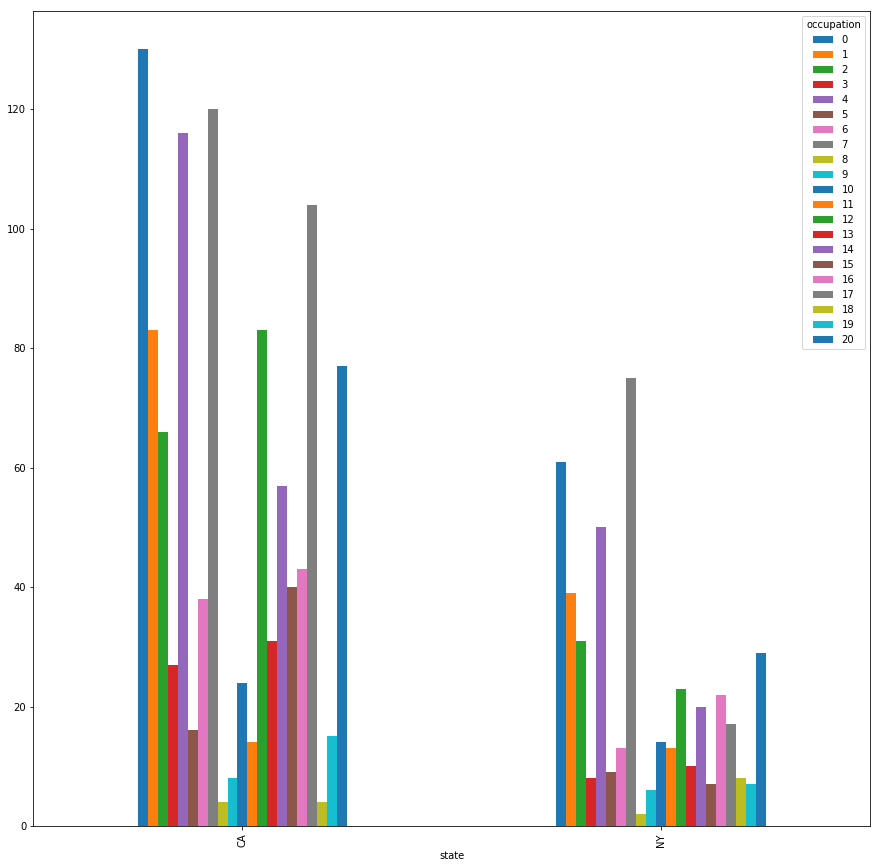

In [40]:
cany.unstack().plot(kind='bar',figsize=(15,15)) #.legend(loc='best', bbox_to_anchor=(1, 1.3))


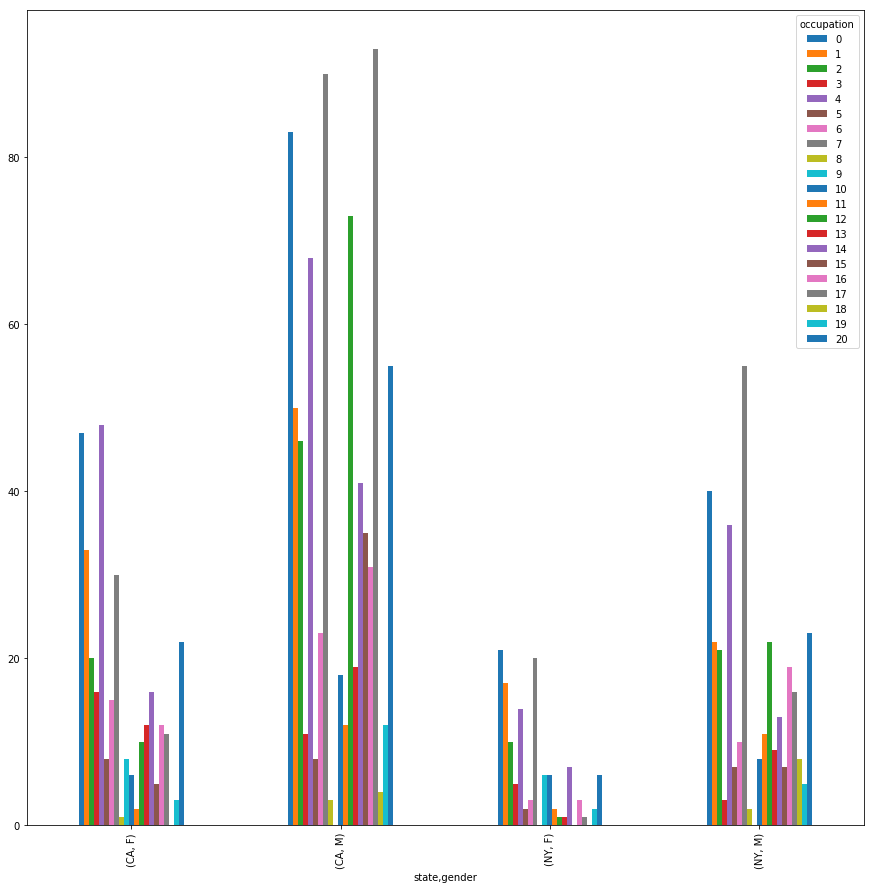

In [41]:
canymf = full[state_mask].groupby(["state", "gender", "occupation"]).size()

canymf.unstack().plot(kind='bar',figsize=(15,15))

In [13]:
# users["gender"] = users["gender"].astype("category")
# users["gender"].cat.set_categories(["M","F"], inplace=True)

In [ ]:
# save to csv
# users.to_csv(path_or_buf=)